In [4]:
import zss
from Bio import Phylo
import numpy as np
import simulator
import csv
import subprocess
import pandas as pd
import os
import matplotlib.pyplot as plt
import sumoted

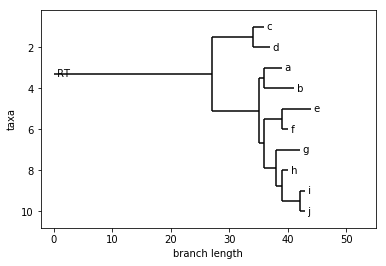

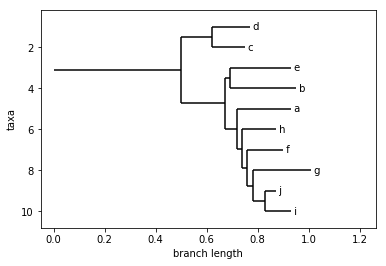

In [31]:
tree1 = Phylo.read('test_tree1.newick', 'newick')
tree2 = Phylo.read('test_tree2.newick', 'newick')
tree1.ladderize()
tree2.ladderize()
Phylo.draw(tree1)
Phylo.draw(tree2)
def get_children(node):
    if node.is_terminal():
        return []
    elif len(node) == 1:
        return[node[0]]
    else:
        return[node[0],node[1]]
false_labels = ord('A')
def get_label(node):
    global false_labels
    if node.name == None:
        node.name = 'X' + chr(false_labels)
        false_labels += 1
    return node.name
def label_dist(A, B):
    if A == B:
        return 0
    else:
        return 1

    
#dist = zss.simple_distance(tree1.root, tree2.root, get_children, get_label, label_dist)
#dist

b'\n    SuMoTED\n    =======\n    Subtree Moving Tree Edit Distance code. Computes the pairwise distance\n    between trees in a directory using the SuMoTED algorithm. Usage:\n      $ python SuMoTED.py directory\n    here directory is a path to a directory of trees. Trees should be specified\n    in a file listing (parent, child) relationships. Trivial example found in /data/toy:\n                   A                       A\n                 /   \\                   /   \\\n        T1  =   B     C       T2  =     D     C\n                |                             |\n                D                             B\n   then /data/toy/ should contain two files named T1 and T2, with content:\n       T1            T2\n       A, B          A, D\n       A, C          A, C\n       B, D          C, B\n    (as it does). We can convert T1 to T2 with a local upward move of D to\n    be a child of A (cost 1), then a local downward move of B to be a child of\n    C (cost 1). Therefore, the un-n